In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
# Importing the data set 
df = pd.read_csv(r"D:\MLR\ToyotaCorolla - MLR.csv")
df = pd.DataFrame(df)
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [29]:
# the columns under the data set is having correct data types hence not required to change 


In [30]:
# checking for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

## Removing Outliers

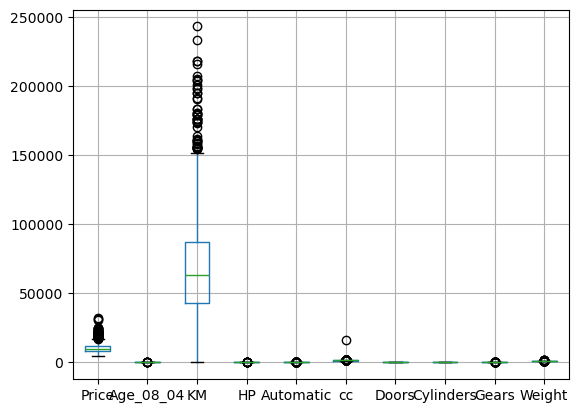

In [39]:
df.boxplot()
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

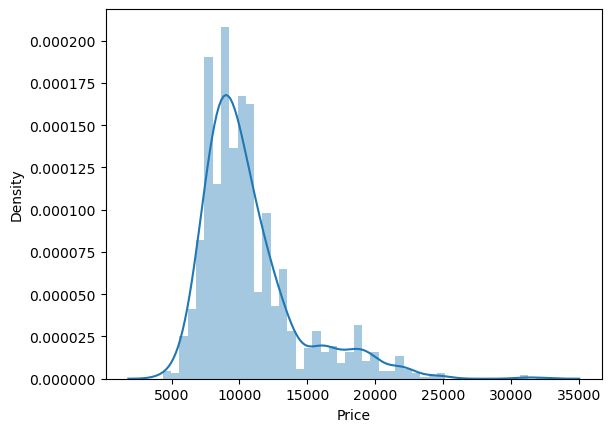

In [41]:
sns.distplot(df['Price'])

<Axes: >

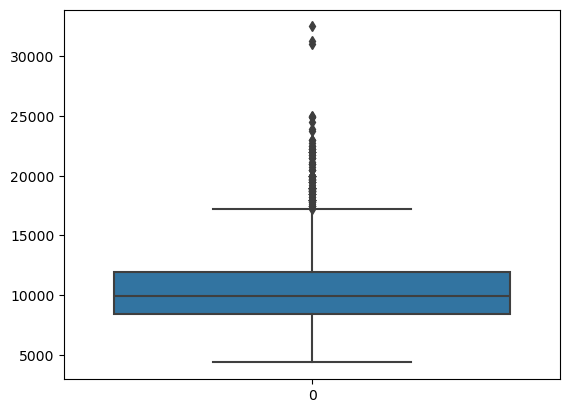

In [42]:
sns.boxplot(df['Price'])

In [43]:
# Finding the IQR range
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3-q1
q1,q3, iqr

(8450.0, 11950.0, 3500.0)

In [44]:
# Find the limits
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(3200.0, 17200.0)

In [45]:
#finding the outliers
df.loc[(df['Price'] > upper_limit) | (df['Price'] < lower_limit)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
182,21125,2,225,Petrol,97,0,1400,5,4,5,1110
183,21500,2,15,Petrol,110,0,1600,5,4,5,1130
184,17795,1,1,Petrol,98,0,1400,4,4,5,1100
185,18245,1,1,Petrol,110,0,1600,5,4,5,1075


In [46]:
# capping - change the outlier values to upper (or) lower limit values

df.loc[(df['Price']>=upper_limit), 'Price'] = upper_limit
df.loc[(df['Price']<=lower_limit), 'Price'] = lower_limit

<Axes: >

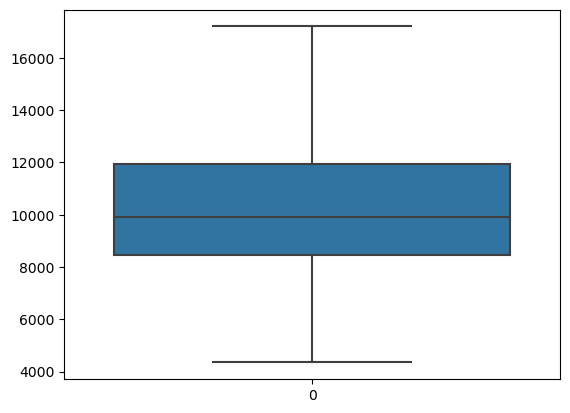

In [47]:
sns.boxplot(df['Price'])

In [48]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

<Axes: xlabel='Age_08_04', ylabel='Density'>

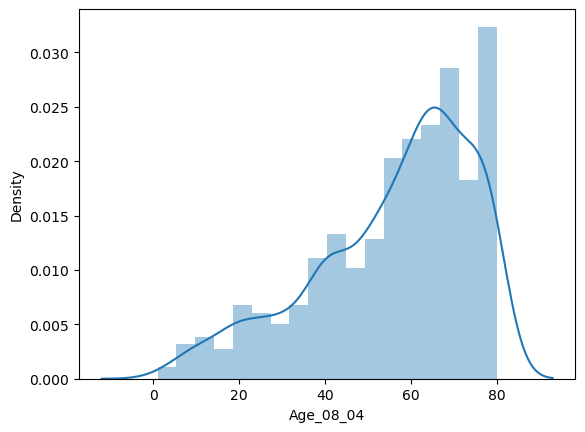

In [49]:
sns.distplot(df['Age_08_04'])

In [50]:
age_q1 = df['Age_08_04'].quantile(0.25)
age_q3 = df['Age_08_04'].quantile(0.75)
age_iqr = age_q3 - age_q1

age_iqr, age_q1 , age_q3

(26.0, 44.0, 70.0)

In [52]:
age_UL = age_q3 + (1.5 * age_iqr)
age_LL = age_q1 - (1.5 * age_iqr)
print('upper limit:', age_UL)
print('lower limit:', age_LL)

upper limit: 109.0
lower limit: 5.0


In [53]:
#finding the outliers
df.loc[(df['Age_08_04']> age_UL) | (df['Age_08_04']<age_LL)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,17200,4,1,Diesel,116,0,2000,5,4,5,1480
110,17200,4,4000,Diesel,116,0,2000,5,4,5,1480
111,17200,4,1500,Diesel,116,0,2000,5,4,5,1480
182,17200,2,225,Petrol,97,0,1400,5,4,5,1110
183,17200,2,15,Petrol,110,0,1600,5,4,5,1130
184,17200,1,1,Petrol,98,0,1400,4,4,5,1100
185,17200,1,1,Petrol,110,0,1600,5,4,5,1075


In [54]:
# capping - change the outlier values to upper (or) lower limit values
df.loc[(df['Age_08_04']>= age_UL), 'Age_08_04'] = age_UL
df.loc[(df['Age_08_04']<= age_LL), 'Age_08_04'] = age_LL

<Axes: >

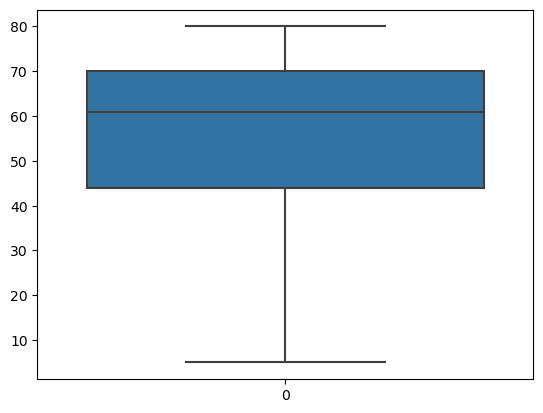

In [55]:
sns.boxplot(df['Age_08_04'])

In [56]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


<Axes: xlabel='KM', ylabel='Density'>

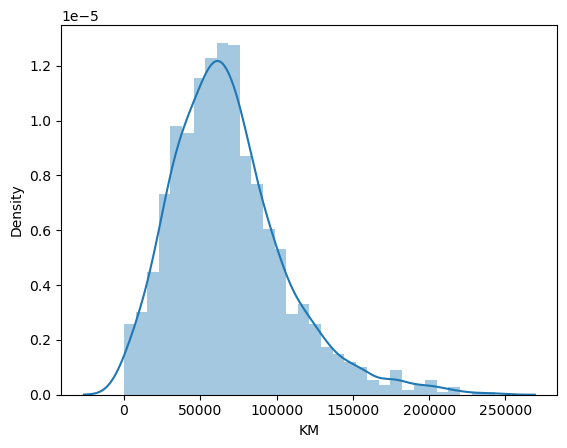

In [57]:
sns.distplot(df['KM'])

<Axes: >

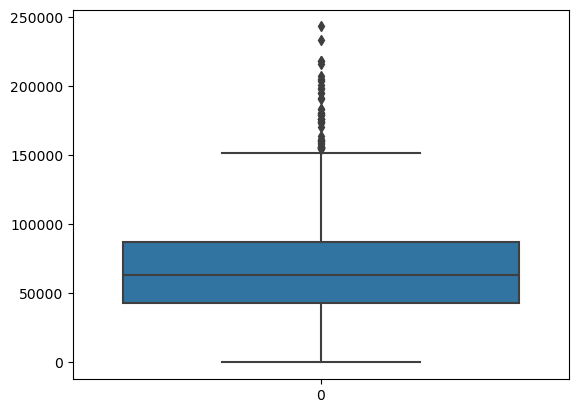

In [58]:
sns.boxplot(df['KM'])

In [59]:
# Z Score 
km_ul = df['KM'].mean() + 3*df['KM'].std()
km_ll = df['KM'].mean() - 3*df['KM'].std()
print('upper limit:', km_ul)
print('lower limit:', km_ll)

upper limit: 181052.6063658723
lower limit: -43986.08686726507


In [60]:
#finding the outliers
df.loc[(df['KM'] > km_ul) | (df['KM'] < km_ll)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
186,6950,43,243000,Diesel,69,0,1900,3,4,5,1110
378,6500,53,216000,Diesel,69,0,1900,3,4,5,1110
379,6400,51,198167,Diesel,69,0,1900,4,4,5,1095
603,6950,58,205000,Diesel,72,0,2000,4,4,5,1100
604,7900,68,204250,Diesel,72,0,2000,3,4,5,1115
605,5950,68,194545,Petrol,86,0,1300,4,4,5,1000
606,7500,59,190900,Diesel,72,0,2000,3,4,5,1115
607,7500,62,183500,Diesel,72,0,2000,5,4,5,1140
1044,5900,73,232940,Diesel,72,0,2000,5,4,5,1172
1045,6950,79,218118,Diesel,72,0,2000,5,4,5,1150


In [61]:
# capping
df.loc[(df['KM']>= km_ul), 'KM'] = km_ul
df.loc[(df['KM']<=km_ll), 'KM'] = km_ll

<Axes: >

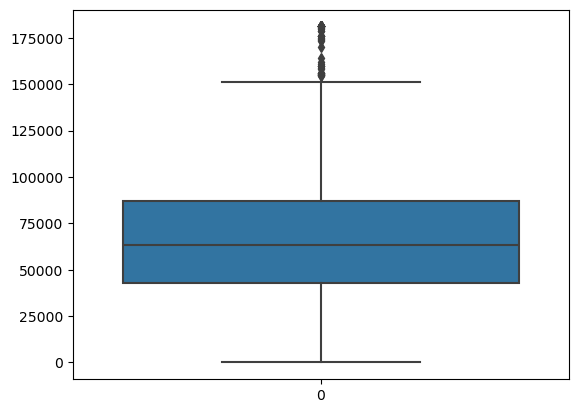

In [62]:
sns.boxplot(df["KM"])

<Axes: xlabel='KM', ylabel='Density'>

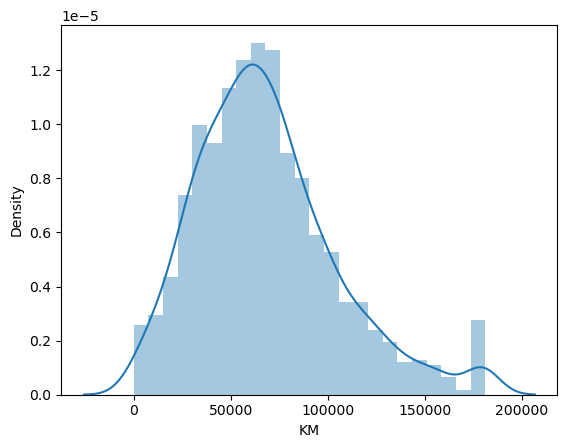

In [63]:
sns.distplot(df["KM"])

In [64]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

<Axes: xlabel='HP', ylabel='Density'>

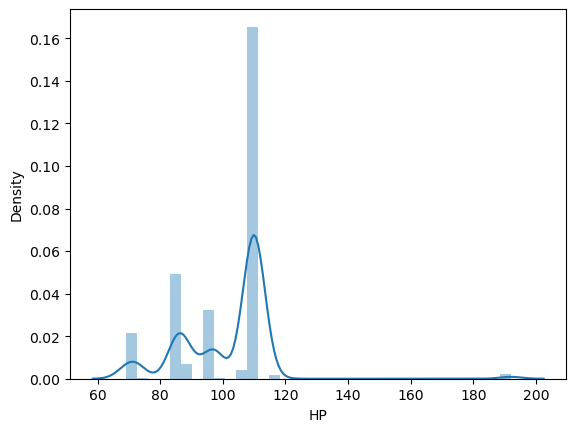

In [65]:
sns.distplot(df['HP'])

<Axes: >

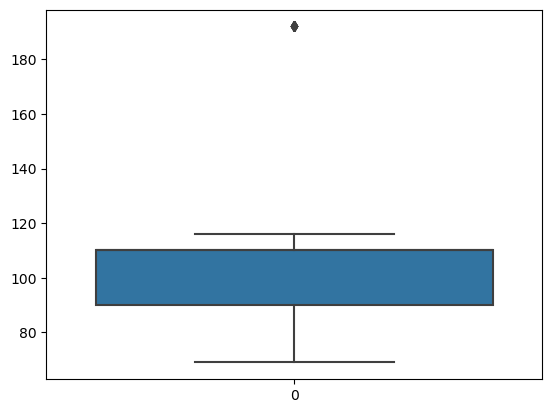

In [66]:
sns.boxplot(df['HP'])

In [67]:
df[df['HP'] > 180]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,17200,27,19700.0,Petrol,192,0,1800,3,4,5,1185
10,17200,25,31461.0,Petrol,192,0,1800,3,4,6,1185
11,17200,22,43610.0,Petrol,192,0,1800,3,4,6,1185
12,17200,25,32189.0,Petrol,192,0,1800,3,4,6,1185
13,17200,31,23000.0,Petrol,192,0,1800,3,4,6,1185
14,17200,32,34131.0,Petrol,192,0,1800,3,4,6,1185
15,17200,28,18739.0,Petrol,192,0,1800,3,4,6,1185
16,17200,30,34000.0,Petrol,192,0,1800,3,4,5,1185
49,17200,31,64982.0,Petrol,192,0,1800,5,4,6,1195
53,17200,27,49866.0,Petrol,192,0,1800,5,4,5,1195


In [68]:
hp_q1 = df['HP'].quantile(0.25)
hp_q3 = df['HP'].quantile(0.75)
hp_iqr = hp_q3 - hp_q1

hp_iqr, hp_q1 , hp_q3

(20.0, 90.0, 110.0)

In [69]:
hp_ul = hp_q3 + (1.5 * hp_iqr)
hp_ll = hp_q1 - (1.5 * hp_iqr)
hp_ul, hp_ll

(140.0, 60.0)

In [70]:
# find the outliers
df.loc[(df['HP'] > hp_ul) | (df['HP'] < hp_ll)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,17200,27,19700.0,Petrol,192,0,1800,3,4,5,1185
10,17200,25,31461.0,Petrol,192,0,1800,3,4,6,1185
11,17200,22,43610.0,Petrol,192,0,1800,3,4,6,1185
12,17200,25,32189.0,Petrol,192,0,1800,3,4,6,1185
13,17200,31,23000.0,Petrol,192,0,1800,3,4,6,1185
14,17200,32,34131.0,Petrol,192,0,1800,3,4,6,1185
15,17200,28,18739.0,Petrol,192,0,1800,3,4,6,1185
16,17200,30,34000.0,Petrol,192,0,1800,3,4,5,1185
49,17200,31,64982.0,Petrol,192,0,1800,5,4,6,1195
53,17200,27,49866.0,Petrol,192,0,1800,5,4,5,1195


In [71]:

df.loc[(df['HP']>hp_ul), 'HP'] = hp_ul
df.loc[(df['HP']<hp_ll), 'HP'] = hp_ll

<Axes: >

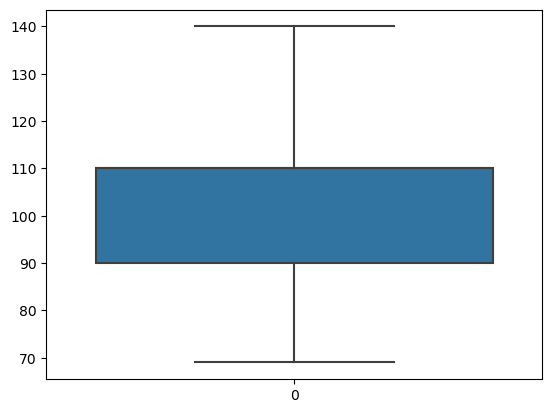

In [72]:
sns.boxplot(df['HP'])

In [73]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

<Axes: xlabel='Weight', ylabel='Density'>

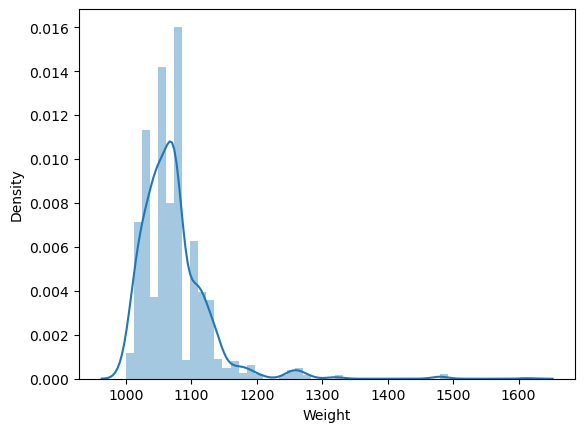

In [76]:
sns.distplot(df['Weight'])

In [77]:
wt_q1 = df['Weight'].quantile(0.25)
wt_q3 = df['Weight'].quantile(0.75)
wt_iqr = wt_q3 - wt_q1

wt_iqr, wt_q1 , wt_q3

(45.0, 1040.0, 1085.0)

In [78]:
wt_ul = wt_q3 + (1.5 * wt_iqr)
wt_ll = wt_q1 - (1.5 * wt_iqr)
wt_ul, wt_ll

(1152.5, 972.5)

In [79]:
# find the outliers
df.loc[(df['Weight'] > wt_ul) | (df['Weight'] < wt_ll)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.000000,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937.000000,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711.000000,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000.000000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500.000000,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
601,7500,50,1.000000,Diesel,90,0,2000,3,4,5,1260
654,6950,65,114383.000000,Diesel,90,0,2000,3,4,5,1260
768,10950,59,78750.000000,Diesel,90,0,1975,5,4,5,1155
960,9390,66,50806.000000,Petrol,86,0,1300,3,4,5,1480


In [80]:

df.loc[(df['Weight']>wt_ul), 'Weight'] = wt_ul
df.loc[(df['Weight']<wt_ll), 'Weight'] = wt_ll

<Axes: >

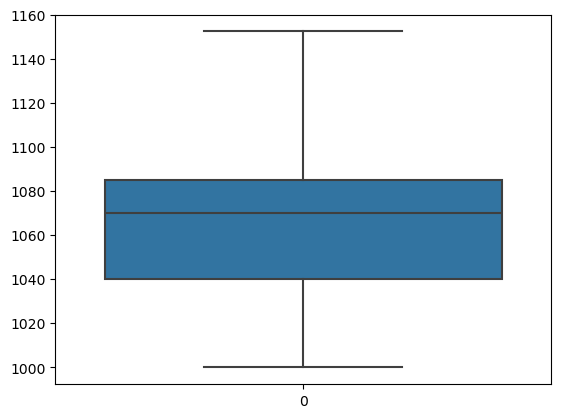

In [81]:
sns.boxplot(df['Weight'])

In [82]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.0,Diesel,90,0,2000,3,4,5,1152.5
1,13750,23,72937.0,Diesel,90,0,2000,3,4,5,1152.5
2,13950,24,41711.0,Diesel,90,0,2000,3,4,5,1152.5
3,14950,26,48000.0,Diesel,90,0,2000,3,4,5,1152.5
4,13750,30,38500.0,Diesel,90,0,2000,3,4,5,1152.5


Handling Categorical Data

In [83]:
# Label enconding 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
# converting Fuel type column values into boolean values


df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

In [85]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986.0,1,90,0,2000,3,4,5,1152.5
1,13750,23,72937.0,1,90,0,2000,3,4,5,1152.5
2,13950,24,41711.0,1,90,0,2000,3,4,5,1152.5
3,14950,26,48000.0,1,90,0,2000,3,4,5,1152.5
4,13750,30,38500.0,1,90,0,2000,3,4,5,1152.5


##Split the dataset into training and testing sets 

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df.columns
# Spliting the data to 
test_df = df['Price']

In [88]:
test_df.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [89]:
df.drop('Price', axis = 1, inplace = True)

In [90]:
x = df
y = test_df

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [92]:
x_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
899,62,59295.0,2,86,0,1300,5,4,5,1035.0
881,68,61568.0,2,110,0,1600,4,4,5,1035.0
310,40,38653.0,2,110,0,1600,5,4,5,1080.0
1145,75,101855.0,2,110,0,1600,5,4,5,1070.0
31,22,35199.0,2,97,0,1400,3,4,5,1100.0
...,...,...,...,...,...,...,...,...,...,...
1095,76,125778.0,2,110,0,1600,3,4,5,1050.0
1130,73,107108.0,2,110,0,1600,3,4,5,1050.0
1294,80,71740.0,2,110,0,1600,5,4,5,1070.0
860,63,64690.0,2,86,0,1300,3,4,5,1020.0


In [94]:
# Standardaization of data 

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [95]:
x_train = SS.fit_transform(x_train)

In [96]:
x_test = SS.transform(x_test)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lr = LinearRegression()

In [99]:
# cross validation
from sklearn.model_selection import cross_val_score

In [152]:
mse = cross_val_score(lr,x_train,y_train,scoring = 'neg_mean_squared_error',cv =3
                     )

In [153]:
np.mean(mse)

-1587221.683927594

In [154]:
lr.fit(x_train, y_train)

LinearRegression()

In [155]:
##Prediction

y_pred = lr.predict(x_test)

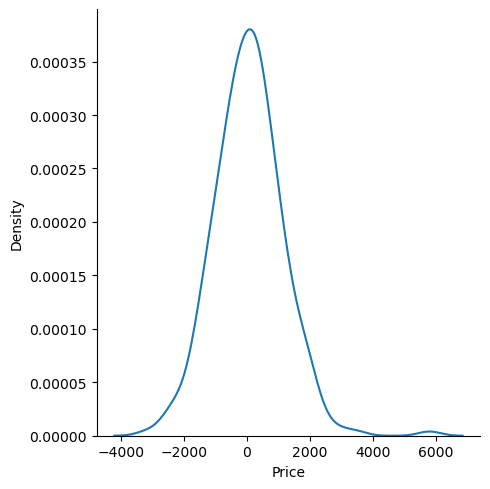

In [156]:
sns.displot(y_pred - y_test, kind = 'kde' )

In [157]:
# Variance in above plt we can see its between -4000 to +4000

In [163]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

In [159]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: 10525.218641114983
Coefficients: [-2.04945482e+03 -5.76508647e+02  2.98548523e+02  1.39767498e+02
  3.97126153e+01 -1.66142136e+01 -2.88846043e+01  5.68434189e-14
  1.03678218e+02  7.35134707e+02]


In [240]:
mean_absolute_error(y_test, y_pred)

833.233198834441

In [241]:
mean_squared_error(y_test, y_pred)

1188971.6685566525

In [242]:
score = r2_score(y_test, y_pred)
print('R2 score :',score)

R2 score : 0.8616136704626361


Ridge regression algorithm

In [161]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [216]:
ridge_regression  = Ridge()

In [217]:
rd1 = ridge_regression.fit(x_train, y_train)

In [218]:
y_pred1 = rd1.predict(x_test)

In [237]:
mean_absolute_error(y_test, y_pred1)

833.243662527536

In [238]:
mean_squared_error(y_test, y_pred1)

1189178.24647824

In [239]:
r2_score(y_test, y_pred1)


0.8615896265252675

In [222]:
# setting the best alpha parameters

parameter = {'alpha' : [0.1, 1, 3, 5 ,10,20,30,40,50,100]}

In [249]:
rd2 = GridSearchCV(ridge_regression, parameter , cv = 2, scoring = 'neg_mean_squared_error' )

In [250]:
rd2 = rd2.fit(x_train , y_train)

In [251]:
y_pred2 = rd2.predict(x_test)

In [252]:
mean_absolute_error(y_test, y_pred2)

834.4795494545697

In [253]:
mean_squared_error(y_test, y_pred2)

1201500.4735963475

In [254]:
r2_score(y_test, y_pred2)


0.8601554226432938

<Axes: xlabel='Price'>

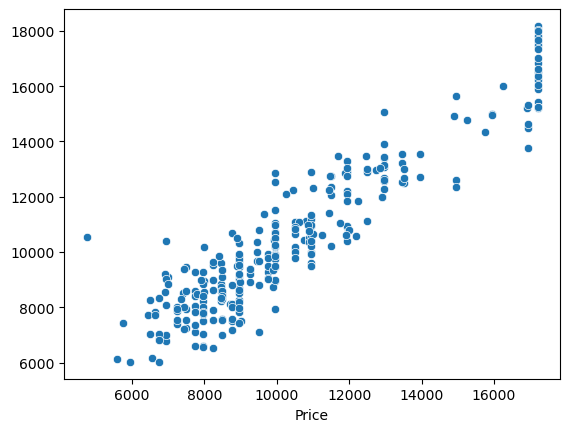

In [282]:
sns.scatterplot(x = y_test, y = y_pred)


Lasso Regression 

In [285]:
from sklearn.linear_model import Lasso

In [286]:
Lasso = Lasso()

In [288]:
la = Lasso.fit(x_train , y_train)

In [289]:
y_pred_la = la.predict(x_test)

In [290]:
mean_absolute_error(y_test, y_pred_la)

833.3460106206561

In [291]:
mean_squared_error(y_test, y_pred_la)

1189249.7048319401

In [293]:
r2_score(y_test, y_pred_la)

0.8615813093722646

In [294]:
# setting the best alpha parameters

parameter = {'alpha' : [0.1, 1, 3, 5 ,10,20,30,40,50,100]}

In [320]:
la2 = GridSearchCV(Lasso, parameter , cv = 2, scoring = 'neg_mean_squared_error' )

In [321]:
la2 = la2.fit(x_train , y_train)

In [309]:
y_pred_la1 = la2.predict(x_test)

In [310]:
mean_absolute_error(y_test, y_pred_la1)

835.8143531185126

In [311]:
mean_squared_error(y_test, y_pred_la1)

1198434.5540299963

In [312]:
r2_score(y_test, y_pred_la1)

0.8605122699649455

In [323]:
la2.best_estimator_

Lasso(alpha=30)

In [324]:
la2.best_score_

-1228415.0804368868